In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skimpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


<h3><p>Exploratory Data Analysis</p></h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum() #Checking null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
print(f'Number of duplicate records are {df.duplicated().sum()}')#Checking duplicate entries

Number of duplicate records are 0


In [7]:
#Printing unique values in each column
for i in df.columns:
    print(i,'=',df[i].unique())
    print('-'*50)

Age = [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
--------------------------------------------------
Attrition = ['Yes' 'No']
--------------------------------------------------
BusinessTravel = ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
DailyRate = [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312 

Number of people left the company are 237 out of 1470


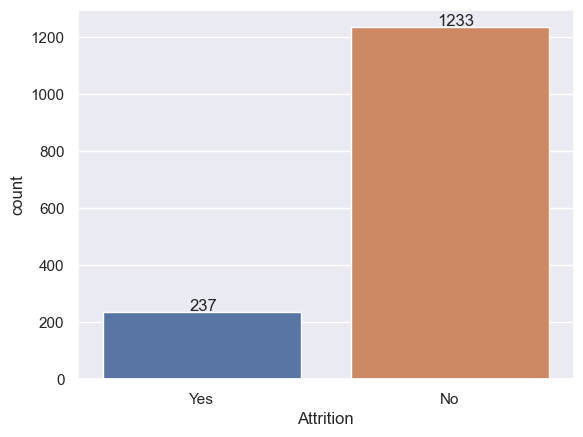

In [8]:
#Plotting countplot of number of attritions
print('Number of people left the company are {} out of {}'.format(len(df[df['Attrition']=='Yes']),len(df)))
ax=sns.countplot(x='Attrition',data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))

<p>Since it is an imbalanced dataset, we cannot use it for fitting into the ML algorithms because it will result into problem of underfitting/overfitting and we will get inefficient results</p>

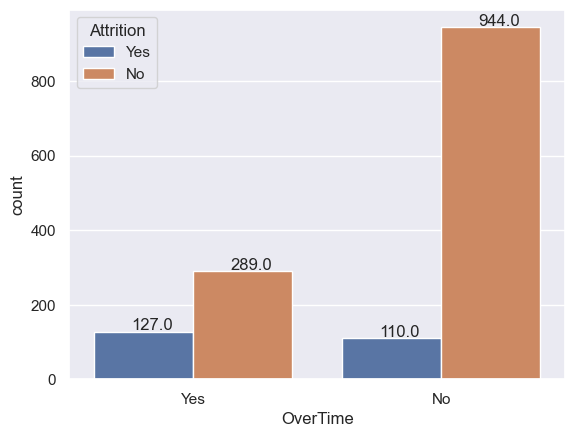

In [9]:
#countplot of attrition vs overtime
ax=sns.countplot(x='OverTime',hue='Attrition',data=df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show()

More attritions happen for people who worked overtime

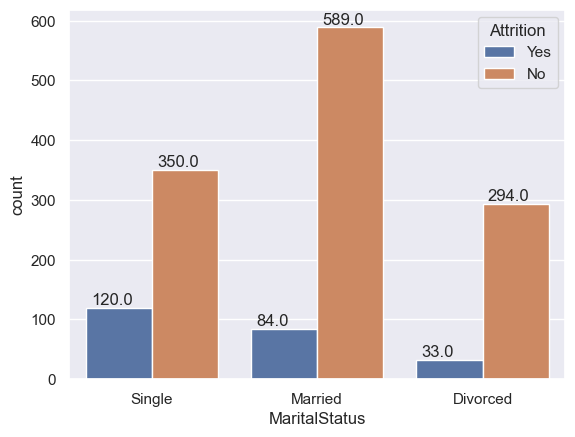

In [10]:
ax=sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+5))
plt.show()

<p>More attritions among single people, maybe due to changing career objectives</p>

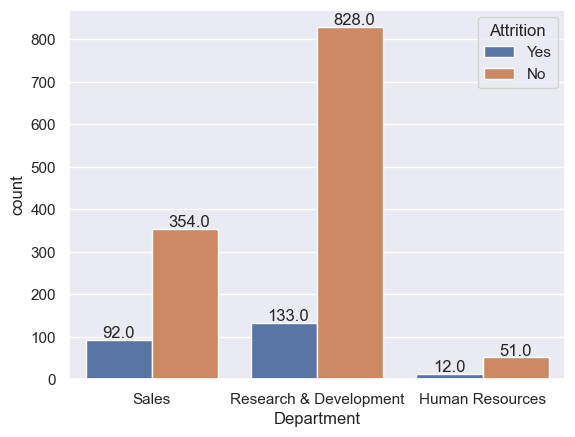

In [11]:
ax=sns.countplot(x='Department',data=df,hue='Attrition')
plt.xticks()
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> R&D dept have seen more attritions followed by sales</p>

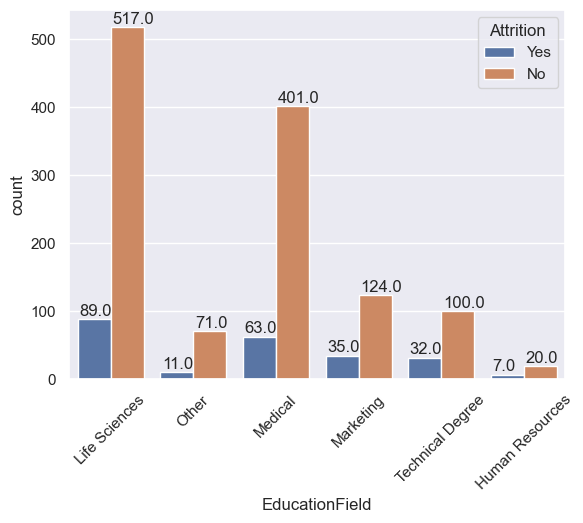

In [12]:
ax=sns.countplot(x='EducationField',hue='Attrition',data=df)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+5))
plt.show()

<p>Employees with life science field have more attrition followed by medical and marketing</p>

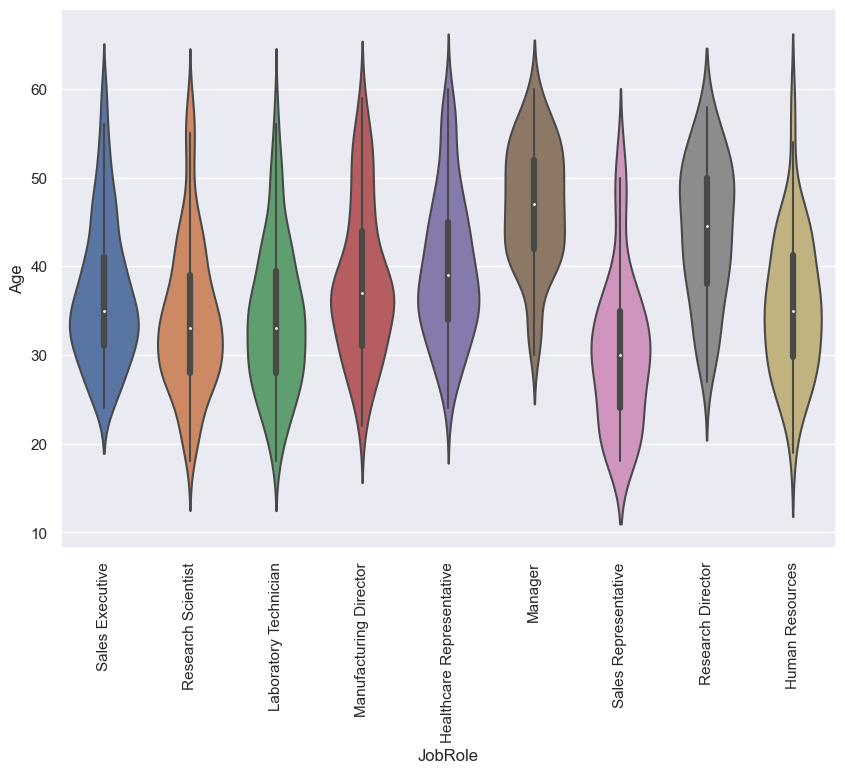

In [13]:
plt.figure(figsize=(10,7))
sns.violinplot(x='JobRole',y="Age",data=df)
plt.xticks(rotation=90)
plt.show()

<p> It is seen that senior positions like manager and director have people with age falling into bracket of 40 to 50</p>

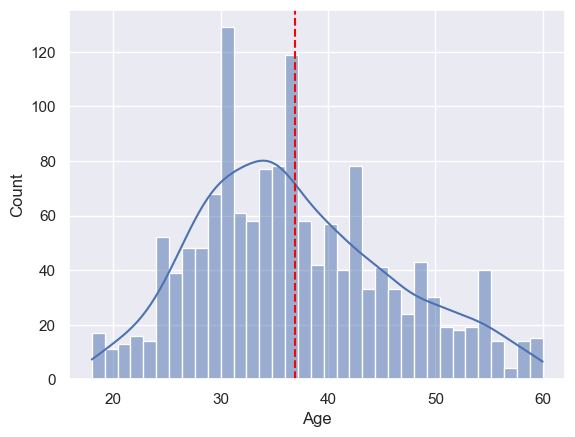

In [14]:
sns.histplot(df['Age'],kde=True,bins=35)
plt.axvline(x=df['Age'].mean(),
            color='red',
            ls='--', 
            lw=1.5)

<p>Mean age is plotted by red line</p>

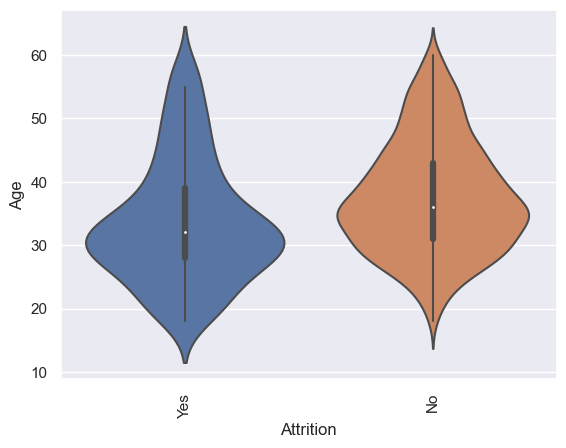

In [15]:
sns.violinplot(x='Attrition',y="Age",data=df)
plt.xticks(rotation=90)
plt.show()

<p>People in 30s have more attrition rate</p>

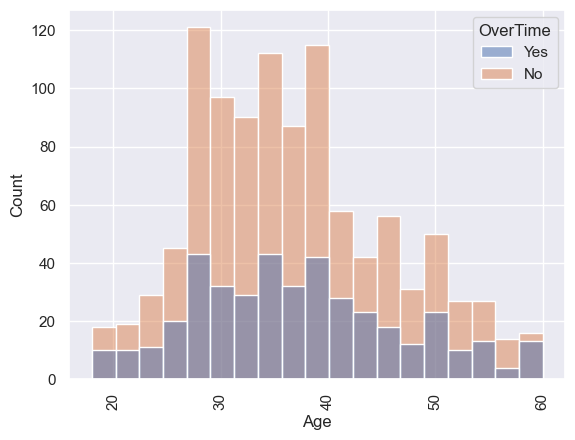

In [16]:
sns.histplot(x='Age',hue="OverTime",data=df)
plt.xticks(rotation=90)
plt.show()

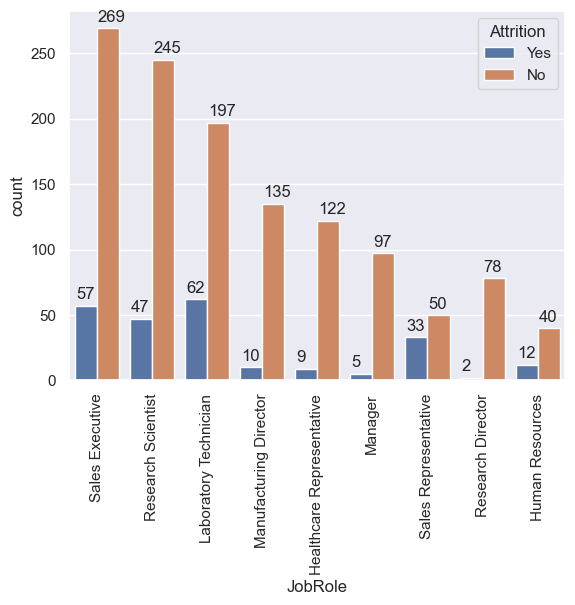

In [17]:
ax=sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+5))
plt.show()

<p>Laboratory technicians have highest attrition rate, closely followed by sales executives and research scientists</p>

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

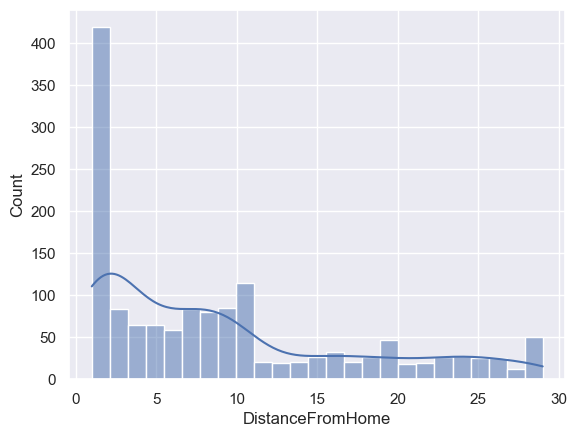

In [18]:
sns.histplot(df['DistanceFromHome'],kde=True,bins=25)

<p>Most employees lie in radius of 10 km from the office</p>

<Axes: xlabel='BusinessTravel', ylabel='count'>

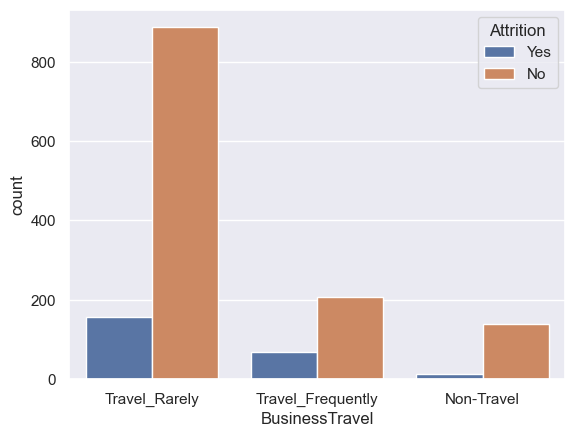

In [19]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

<p>Employees who travel rarely have more attrition rate</p>

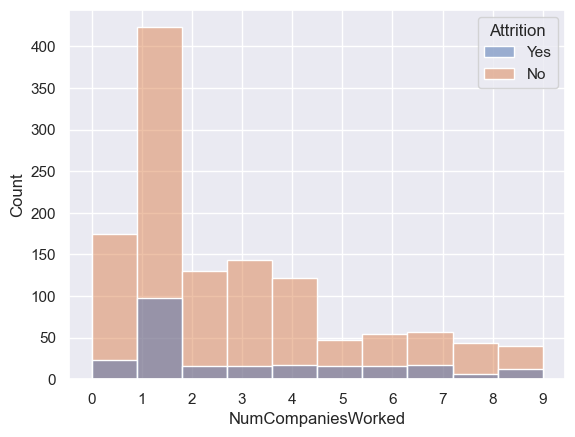

In [20]:
sns.histplot(x='NumCompaniesWorked',kde=False,bins=10,hue='Attrition',data=df)
plt.xticks(range(0,10))
plt.show()


<p>Employees who have worked in only 1 company have more attrition rate</p>

<h2><p><b>Pre-Processing</b></p></h2>

In [21]:
#dropping features which are not needed
df=df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'],axis=1)

<p>Plotting a corellation graph</p>

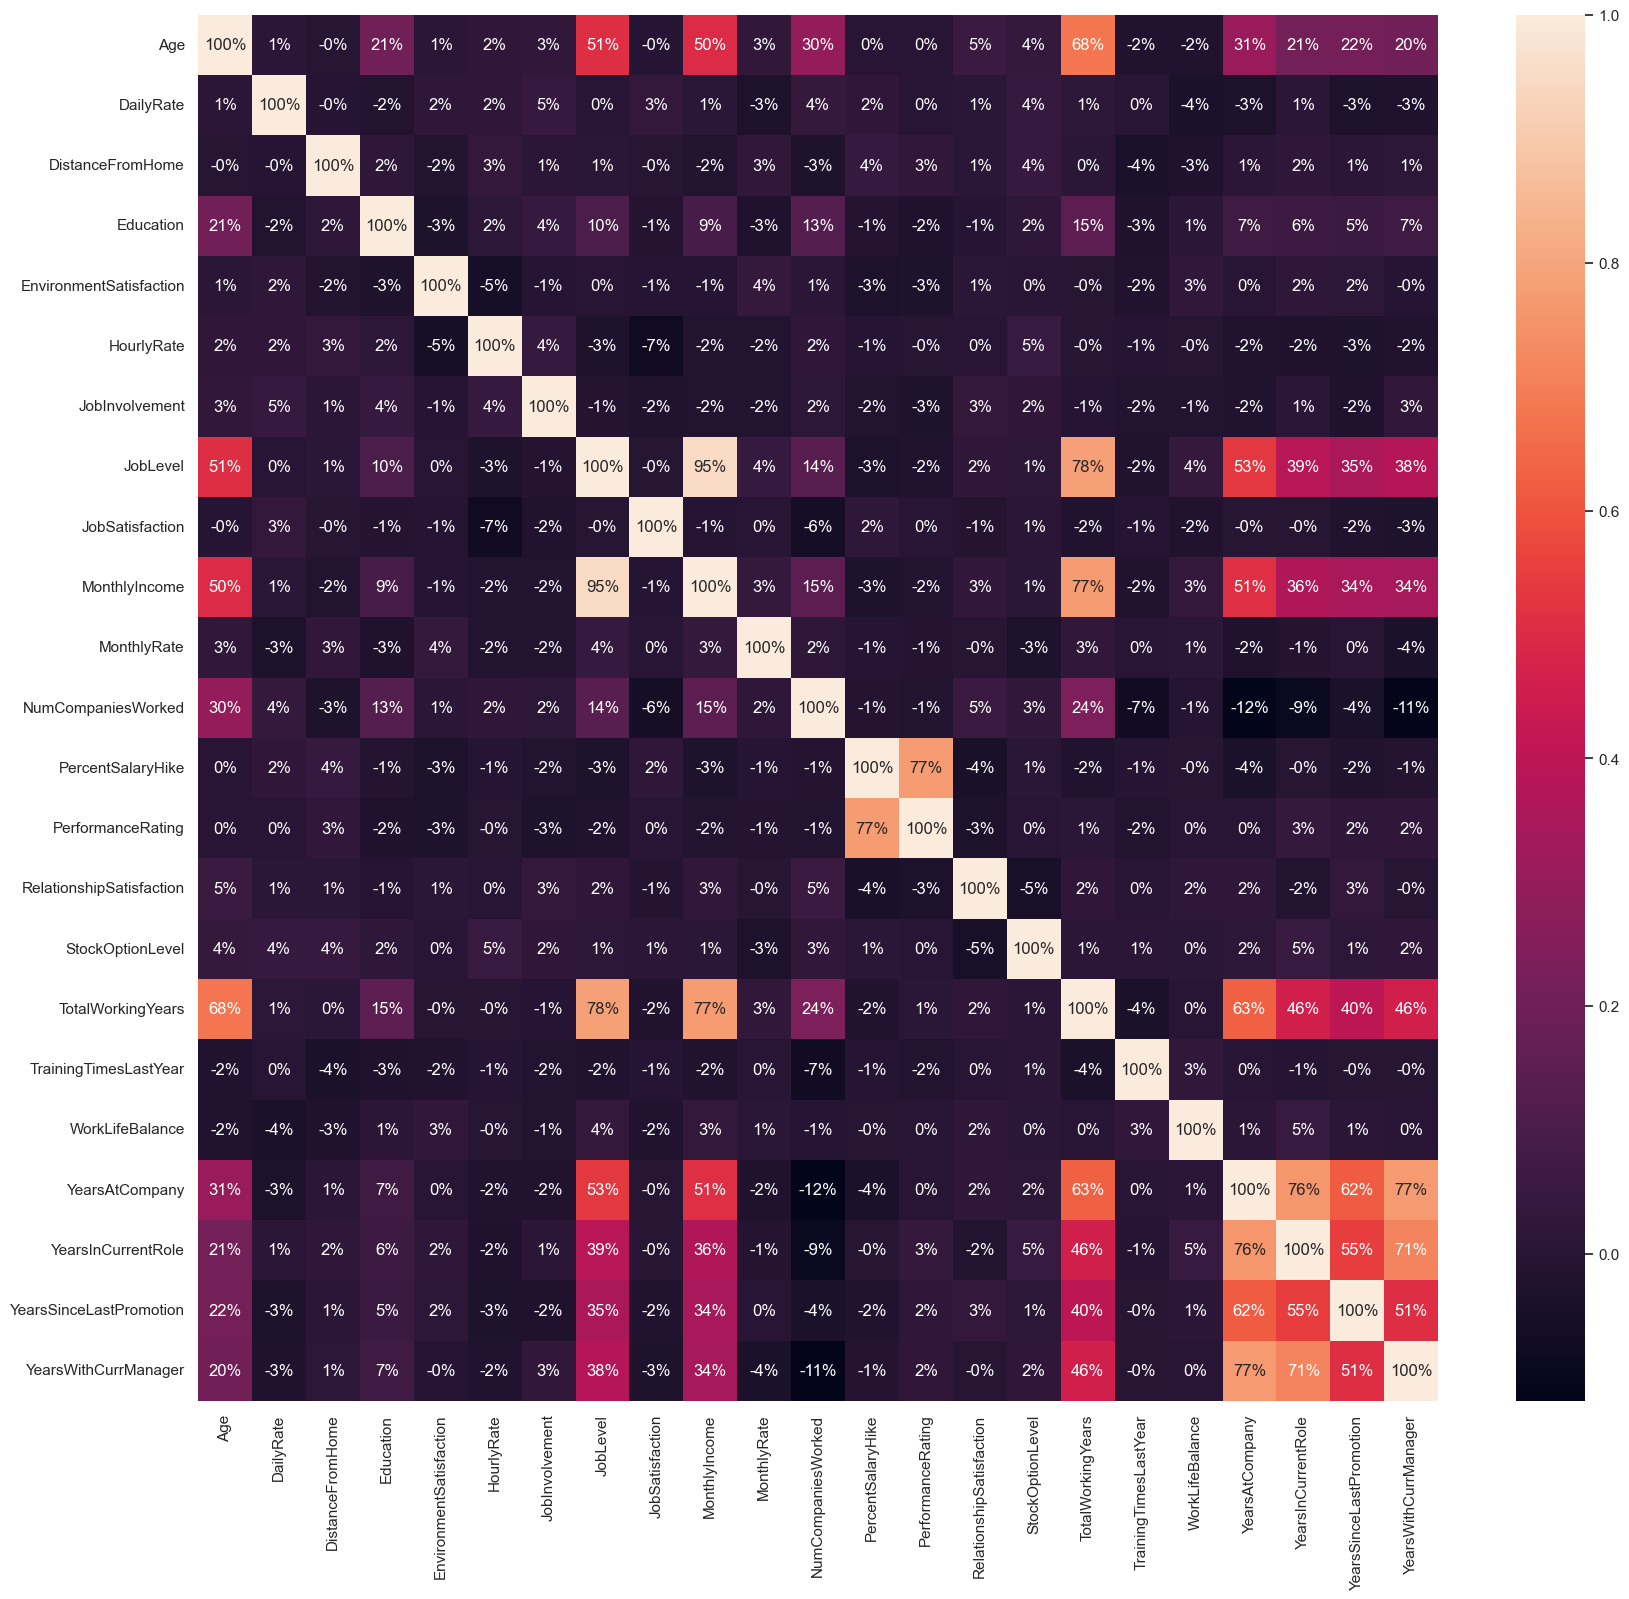

In [22]:
plt.figure(figsize=(20,18))
sns.heatmap(df.select_dtypes('number').corr(),annot=True,fmt=".0%")
plt.show()

In [23]:
#Changing categorical values to int values as categorical values are not read by machine learning algorithms
df['BusinessTravel']=df['BusinessTravel'].map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})
df['Department']=df['Department'].map({'Sales':2,'Research & Development':1,'Human Resources':0})
df['EducationField']=df['EducationField'].map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['JobRole']=df['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
                                 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,
                                 'Sales Representative':6, 'Research Director':7, 'Human Resources':8})
df['MaritalStatus']=df['MaritalStatus'].map({'Married':0,'Single':1,'Divorced':2})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})

In [24]:
#Divinding data into dependent and independent features
X=df.drop(columns=['Attrition'],axis=1)
y=df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

<p><b>Since it is an imbalanced dataset, it is necessary to make it balanced using imputation technique</b></p>

In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [26]:
#SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
sm=SMOTE()
oversampled_X, oversampled_y = sm.fit_resample(X,y)


<h2><p>Model Development</p></h2>

In [27]:
#dividing dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(oversampled_X, oversampled_y,test_size=0.2,random_state=42)

In [28]:
#making a list of models
model_list={'Random Forest Classifier':RandomForestClassifier(n_estimators=100),
            'Logistic Regression':LogisticRegression(),
           'SVC':SVC(random_state=101),
           'Naive Bayes':GaussianNB(),
           'Decision Tree Classifier':DecisionTreeClassifier()}

In [29]:
models_evaluation=[]
prediction_report=[]
for name,model in model_list.items():
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    prediction_report.append(prediction)
    models_evaluation.append((name,accuracy_score(prediction,y_test)))

In [30]:
model_df=pd.DataFrame(models_evaluation,columns=['Classifier','Accuracy Score'])

In [31]:
model_df=model_df.sort_values(by='Accuracy Score')

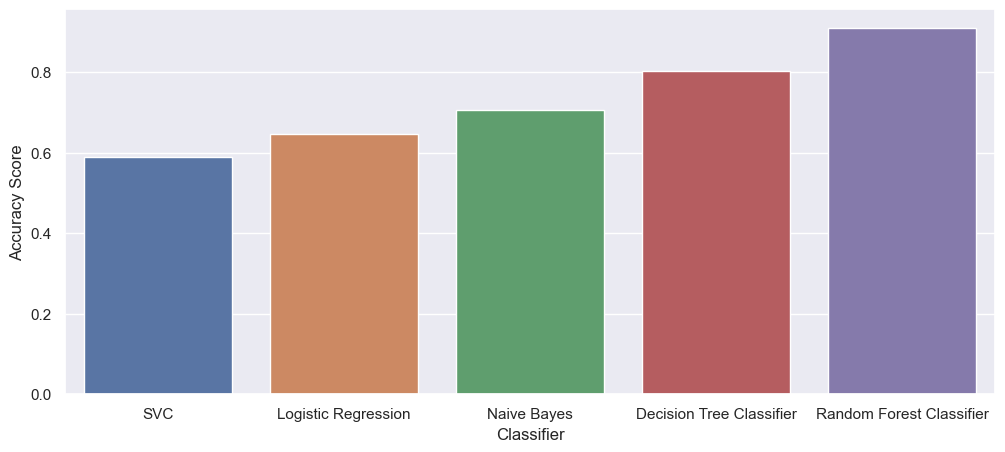

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x=model_df['Classifier'],y=model_df['Accuracy Score'])
# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+5))
plt.xticks()
plt.show()

<p><b>Random forest Classifier have shown the best accuracy score </b></p>

In [33]:
cm=classification_report(y_test,prediction_report[0],labels=model.classes_)
# sns.heatmap(cm,annot=True)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       250
           1       0.93      0.89      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



<p><b>End of notebook</b></p>